# Taming Our Future AI Overlords

Welcome! This is a workshop created for the [Lakeside Hackfest](https://www.lakeside-hackfest.com/) in 2018. Feel free to look around - but expect to learn things!

The goal is to get an overview over the current status of machine learning techniques in a way that enables you to keep learning and understand what people are talking about, at least roughly. Therefore, this session covers:

- Classic machine learning  
- Deep learning with Keras and CNTK/Tensorflow
- Cognitive Services 

In order to run this notebook, a Python 3.5 runtime environment is required, GPUs are of course preferred for more experimentation, but it should work with CPU only as well. With that available it's strictly necessary to have fun :) and simply work through everything from top to bottom. 


## Prepare

The following cell (clumsily) installs all required dependencies using the current Python's `pip` installer. If you have a new-ish NVidia GPU available, be sure to install `cntk-gpu` (or `tensorflow-gpu`) instead of their regular CPU versions. 


In [1]:
import sys
!{sys.executable} -m pip install matplotlib scikit-learn numpy keras==2.2.2 azure-cognitiveservices-vision-customvision cntk-gpu==2.5.1 # cntk or cntk-gpu    

## Classic Machine Learning

The first step is to try out a simple classic machine learning algorithm and see how it performs. This will also establish a baseline for later models to beat! The most common thing to use here is `scikit-learn`, and the problem we are tackling is a multiclass-classification problem: we want to know what category that clothing item belongs to!

### Task 1: >79% Accuracy

To understand the process better, let's try and **train a model to be more than 79% accurate** - still, every 5th classificaiton will be wrong, but it should be good enough for now. Find an algorithm and parameters from [here](http://scikit-learn.org/stable/modules/multiclass.html) and train a model that exceeds 79% accuracy! Try out different things:

- Algorithms
- Parameters
- Training data set size
- ...


In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import random


from sklearn import neighbors, linear_model, tree, ensemble, neural_network, svm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from collections import Counter

In [3]:
def load_data(path):
    data = np.genfromtxt(path, delimiter=',')[1:] # skip header row
    y, x = np.split(data, [1], axis = 1) # split vertically after the first column, which contains the class
    return x, y

In [4]:
def print_prediction_stats(label, y_pred, y_true):
    print(label, accuracy_score(y_true, y_pred))

In [5]:
def train(model, X, y):
    model.fit(X, y)
    return model

In [6]:
def explore(X, y):

    random_img = random.choice(X);
    plt.figure()
    plt.title("The Random Image")
    plt.imshow(random_img.reshape((28,28)), cmap = 'gray')
   
    plt.figure(figsize = (16, 6))
    plt.title("Random Image Histogram")
    c = Counter()
    for r in random_img: c[r] += 1
    colors = list(range(0, 256))
    plt.hist([c[h] for h in colors], colors)

In [7]:
X_train, y_train = load_data("fashion-mnist_train.csv")
X_test, y_test = load_data("fashion-mnist_test.csv")

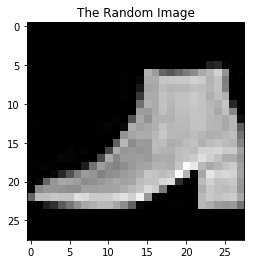

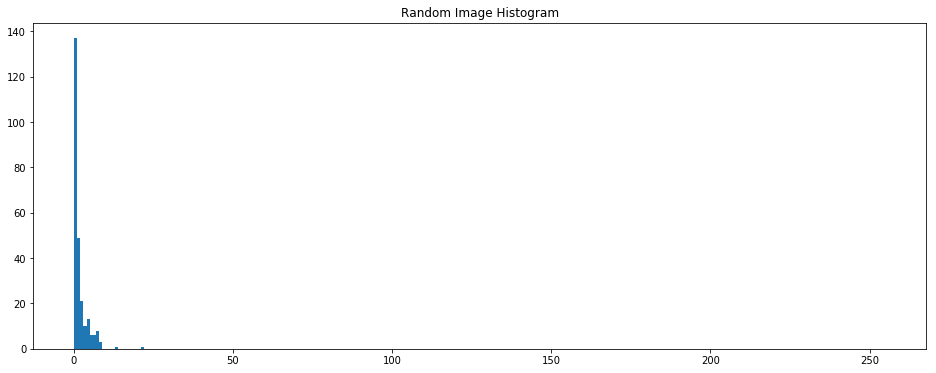

In [8]:
def create_mnist(n_training = 5000):
    explore(X_train, y_train)
    X, _, y, _ = train_test_split(X_train, y_train, train_size=n_training, test_size=0)
    def f(model):
        trained = train(model, X, y)
        y_pred = trained.predict(X_test)
        print_prediction_stats(trained, y_test, y_pred)
        return trained
    return f

MNIST = create_mnist()

In [9]:
#
# Task 1: Run MNIST(MyModelInstance)
#

MNIST(neighbors.KNeighborsClassifier(1))
MNIST(linear_model.LogisticRegression())
MNIST(tree.DecisionTreeClassifier())
MNIST(ensemble.RandomForestClassifier())
MNIST(neural_network.MLPClassifier())
MNIST(svm.SVC(kernel="poly", C=10))

/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform') 0.7969


/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False) 0.7483
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best') 0.7375


/anaconda/envs/py35/lib/python3.5/site-packages/ipykernel/__main__.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  from ipykernel import kernelapp as app


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False) 0.8083


/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/neural_network/multilayer_perceptron.py:912: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False) 0.7864


/anaconda/envs/py35/lib/python3.5/site-packages/sklearn/utils/validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False) 0.8295


SVC(C=10, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

## Deep Learning

In this second part we are going to utilize deep learning strategies in order to improve accuracy! In particular, the neural network we will use is a convolutional neural network with 18 layers, taken from the brilliant [deep Learning turkey](https://medium.com/deep-learning-turkey/deep-learning-lab-episode-1-fashion-mnist-c7af60029836). Instead of training from scratch (because who has that kind of time), we are going to use pre-learned weights to get a network that already performs very well. 

In fact, this is a very common strategy: taking existing network architectures ([AlexNet](https://en.wikipedia.org/wiki/AlexNet), VGGNet, LeNet, ...) and training on top of pre-trained weights (e.g. [ImageNet data](http://www.image-net.org/)). This process is also called transfer learning and is quite useful for getting good results quickly. 

Instead of the turkey's network we could have adjusted the image size (filling up the background) to conform to AlexNet's (or similar) dimensions of 224x224. This is something that you can try on your own.



### Task 2: Keep Training

Once a network has been created, it's possible to add weights from previous training runs giving it a head start. Use Keras to load weights into the model and train for another epoch or two (depending on the time).  

### Task 3: Gather Stats

With the deep learning model, predict the classes of a few images from the test set and see how it performs. To do that, collect classification errors relative to the sample size!


In [10]:
import os
os.environ["KERAS_BACKEND"] = "cntk" # delete this line to use tensorflow

import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.regularizers import l2
from keras.datasets import fashion_mnist

/anaconda/envs/py35/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using CNTK backend


In [11]:
num_classes = 10


input_shape = (28, 28, 1)

x_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
x_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255



In [12]:

def build_model():
    model = Sequential()
    model.add(Conv2D(32, (3, 3), padding='same', kernel_regularizer=l2(0.01), input_shape=input_shape))
    model.add(Activation('relu'))
    model.add(Conv2D(32, (5, 5), kernel_regularizer=l2(0.01)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64, (3, 3), padding='same', kernel_regularizer=l2(0.01)))
    model.add(Activation('relu'))
    model.add(Conv2D(64, (5, 5), kernel_regularizer=l2(0.01)))
    model.add(Activation('relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(512))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(num_classes))
    model.add(Activation('softmax'))
    return model

model = build_model()
model.summary()
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        25632     
_________________________________________________________________
activation_2 (Activation)    (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 12, 64)        18496     
__________

In [13]:
#
# Task 2: Keep training by loading the weights and running another training epoch or two.
#

model.load_weights("fashion-mnist-90.h5")
epochs = 2                # loss function value will be stabilized after 93rd epoch
batch_size = 128           # or 32, 64 ... 
model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              shuffle=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/2
60000/60000 [==============================] - 8s 126us/step - loss: 0.2955 - acc: 0.9150 - val_loss: 0.2439 - val_acc: 0.9356
Epoch 2/2
60000/60000 [==============================] - 6s 108us/step - loss: 0.2938 - acc: 0.9147 - val_loss: 0.2315 - val_acc: 0.9394


In [14]:
#
# Task 3: Gather prediction accuracy for a few (10?) items from the test data set
#

test_data = list(zip(x_test, y_test))

# Generate a random test set

sample_size = 20
error = 0

x, y = tuple(zip(*(random.choice(test_data) for _ in range(0, sample_size))))
result = model.predict_classes(np.array(x))
for predicted, actual in zip(result, [np.where(y_ == 1)[0][0] for y_ in y]):
    if predicted != actual: error += 1

print("Test accuracy: ", 1 - (error / sample_size))
    

Test accuracy:  0.9


## APIs

In a last attempt, let's try out some prebuilt services. In many cases they are a lot easier to use and produce usable results within minutes, making them ideal for prototypes as well as production cases. 

Microsoft's cognitive services contain various services around custom and prebuilt machine learning tasks, paid per call with a free tier. For this exercise, the free tier should work out fine - however production use cases better use a paid version :)

The service we are using here is called [custom vision](https://customvision.ai) and provides a trainable image classification service complete with: 

- Model versioning
- Rest API
- UI for labelling and data management


### Task 4: Data Wrangling

A major task in any machine learning engagement is to get the data you need in the shape, mode, and size required. With this task you should fill in the function `make_img()` which is expected to create an image from a simple array of values. This image should be usable for the API!

### Task 5: Test The API's Model

Once trained, the model can deliver predictions! Find out how, implement it, and see how well it performs!


In [15]:
# Mapping class numbers to names

mapping = {
    0: "T-shirt/top", 
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle boot"
}

training_key = ""
project_id = ""
prediction_key = ""

In [16]:
from io import BytesIO
import time

from azure.cognitiveservices.vision.customvision.training import training_api
from azure.cognitiveservices.vision.customvision.prediction import prediction_endpoint
from azure.cognitiveservices.vision.customvision.prediction.prediction_endpoint import models


In [17]:
#
# Task 4: Create a JPEG, PNG, or BMP to upload to custom vision.
# 

def make_img(pd):
    img = np.array(pd).reshape((28, 28))
    img_data = BytesIO()
    plt.imsave(img_data, img, format="png", cmap=plt.cm.gray)
    img_data.seek(0) # Reset byte stream
    return img_data

In [18]:
# Create API connection
trainer = training_api.TrainingApi(training_key)

# Creating tags twice will result in an error...
tags = [trainer.create_tag(project_id, name) for key, name in sorted(mapping.items(), key=lambda i: i[0])]

In [19]:
# Generate a test set suitable for the free tier (5000 images take a long time to upload...)

X, _, Y, _ = train_test_split(X_train, y_train, train_size = 5000, test_size=0)

for x, y in zip(X, Y):
    img_data = make_img(x)
    status = trainer.create_images_from_data(project_id, img_data, [ tags[np.where(y == 1)[0][0]].id ])    

In [20]:
# Start training and wait for it to finish.

iteration = trainer.train_project(project_id)

while (iteration.status != "Completed"):
    iteration = trainer.get_iteration(project_id, iteration.id)
    print ("Training status: " + iteration.status)
    time.sleep(1)


Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Training
Training status: Completed


In [21]:
#
# Task 5: Predict! Check the tutorials for how to create a prediction endpoint and use it to send images there
#
from functools import reduce
test_data = list(zip(X_test, y_test))

# Generate a random test set

sample_size = 20

sample = [random.choice(test_data) for _ in range(0, sample_size)]

predictor = prediction_endpoint.PredictionEndpoint(prediction_key)

# Feed test data into the API

errors = 0

for x, y in sample: 
    img_data = make_img(x)
    results = predictor.predict_image(project_id, img_data, iteration.id)
    actual = mapping[np.where(y == 1)[0][0]]
    probability, tag = reduce(lambda p, c: p if p[0] > c.probability else (c.probability, c.tag_name), results.predictions, (-1, "Invalid"))
    if actual != tag: errors += 1
        
print("Test accuracy: ", 1 - (errors / sample_size))

Test accuracy:  0.8


# Done!

That's it, there is way more to learn out there and this session should provide an overview over what's possible and a basic vocabulary. Check out these links to find out more about this entire space!

- [Andrew Ng's ML basics course](https://www.coursera.org/learn/machine-learning)
- [Deep Learning specialization](https://www.coursera.org/specializations/deep-learning)
- [Understanding CNNs](https://adeshpande3.github.io/adeshpande3.github.io/A-Beginner's-Guide-To-Understanding-Convolutional-Neural-Networks/)
- [Custom Vision SDK Tutorial](https://docs.microsoft.com/en-us/azure/cognitive-services/Custom-Vision-Service/python-tutorial)
- [Keras Docs](https://keras.io/)
- [Kaggle](https://kaggle.com)
- [Deep Learning the Fashion MNIST](https://medium.com/deep-learning-turkey/deep-learning-lab-episode-1-fashion-mnist-c7af60029836)
- [Fashion MNIST Benchmarks](http://fashion-mnist.s3-website.eu-central-1.amazonaws.com/#)
- [CNTK Tutorials](https://cntk.ai/pythondocs/tutorials.html)